# Neural ODE example notebook

Load packages/functionality from nODE and training

In [1]:
import torch
import numpy as np
from models.training import easyTrainer, weights_to_dataset
from models.nODE import nODE, make_nODE_from_parameters
import matplotlib.pyplot as plt
device = 'cpu'#torch.device('cuda' if torch.cuda.is_available() else 'cpu')''

c:\Users\Lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generate repressilator dataset based on parameters

Plot phase portrait based on current nODE parameters..


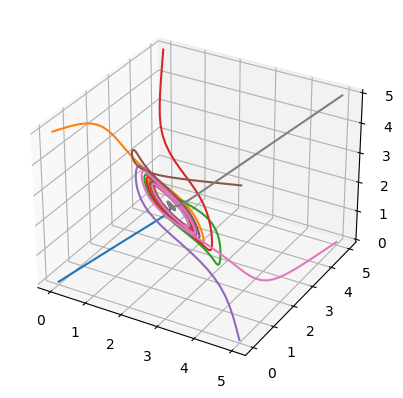

In [2]:
ODE_dim = 3
Gamma = np.array([-1., -1., -1.])
integration_time = 1
Win = np.array([[0, 0, -1.], [-1., 0, 0], [0,-1.,0]])
Wout = np.array([[2., 0, 0], [0, 2., 0], [0,0,2.]])
bin = np.array([[2.], [2.], [2.]])
bout = np.array([[2.2], [2.], [2.]])

train_data, test_data = weights_to_dataset(integration_time, Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout, batch_size = 10)

true_model = make_nODE_from_parameters(Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)

true_model.phase_portrait(dim3=2, gridpoints=1, time_interval=[0.,10.])

Epoch 1: 0.743
Epoch 2: 0.534
Epoch 3: 0.393
Epoch 4: 0.299
Epoch 5: 0.234
Epoch 6: 0.181
Epoch 7: 0.151
Epoch 8: 0.135
Epoch 9: 0.120
Epoch 10: 0.111
Epoch 11: 0.109
Epoch 12: 0.106
Epoch 13: 0.098
Epoch 14: 0.090
Epoch 15: 0.085
Epoch 16: 0.083
Epoch 17: 0.082
Epoch 18: 0.078
Epoch 19: 0.074
Epoch 20: 0.070
Epoch 21: 0.066
Epoch 22: 0.062
Epoch 23: 0.060
Epoch 24: 0.059
Epoch 25: 0.058
Epoch 26: 0.055
Epoch 27: 0.052
Epoch 28: 0.051
Epoch 29: 0.051
Epoch 30: 0.051
Epoch 31: 0.049
Epoch 32: 0.049
Epoch 33: 0.049
Epoch 34: 0.049
Epoch 35: 0.048
Epoch 36: 0.047
Epoch 37: 0.046
Epoch 38: 0.045
Epoch 39: 0.044
Epoch 40: 0.044
Epoch 41: 0.043
Epoch 42: 0.043
Epoch 43: 0.042
Epoch 44: 0.041
Epoch 45: 0.041
Epoch 46: 0.040
Epoch 47: 0.039
Epoch 48: 0.039
Epoch 49: 0.038
Epoch 50: 0.037
Epoch 51: 0.036
Epoch 52: 0.035
Epoch 53: 0.034
Epoch 54: 0.033
Epoch 55: 0.032
Epoch 56: 0.031
Epoch 57: 0.030
Epoch 58: 0.029
Epoch 59: 0.028
Epoch 60: 0.027
Epoch 61: 0.026
Epoch 62: 0.026
Epoch 63: 0.027
E

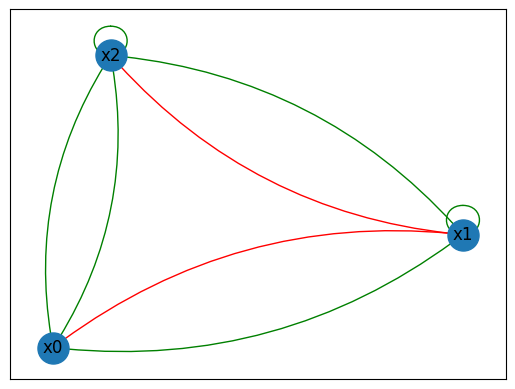

both
Gx + w1tanh(w2x(t)+b2)+b1    over the interval [0, 1]
G = [-1.7138672 -1.8087059 -1.116007 ], W1 = [[-0.85139126  1.645234    1.8591251 ]
 [ 1.9993995   1.3700804   2.0665889 ]
 [-1.1314204  -1.9087043   0.73790294]],        b1 = [2.0722635 1.612887  1.4036806]

W2= [[-1.1536788   0.63389814  0.7329059 ]
 [ 0.12078997  0.32950497 -0.6532694 ]
 [-0.4510444   1.0359477   1.5146934 ]],        b2 = [-0.2799608   0.21538253  1.4954838 ]




In [6]:
node = nODE(ODE_dim, architecture='outside_weights', time_interval=[0, integration_time])

optimizer_node = torch.optim.Adam(node.parameters(), lr=1e-1)

trainer = easyTrainer(node, optimizer_node, device)

trainer.train(train_data, 400)

node.plot()
print(node)

Plot phase portrait based on current nODE parameters..


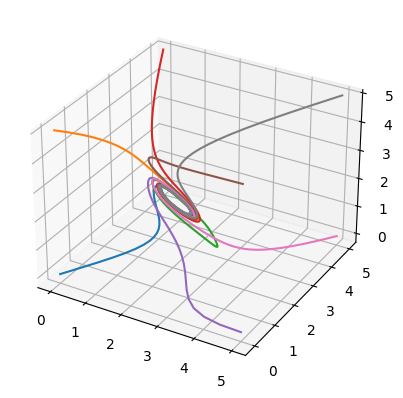

In [7]:
node.phase_portrait(dim3=2, gridpoints=1, time_interval=[0.,10.])